In [1]:
# based on allensdk.model.biophysical.biophysical_perisomatic.runner

# These will be useful for accessing and configuring the downloaded model
from allensdk.model.biophys_sim.config import Config
from allensdk.model.biophysical_perisomatic.utils import Utils

# not using NwbDataSet
# from allensdk.core.nwb_data_set import NwbDataSet

# We'll use a simple csv file with time and current instead
from allensdk.core.dat_utilities import DatUtilities

In [2]:
from allensdk.api.queries.biophysical_perisomatic_api import BiophysicalPerisomaticApi

neuronal_model_id = 472451419    # get this from the web site as above
model_directory = '.'

bp = BiophysicalPerisomaticApi('http://api.brain-map.org')
bp.cache_stimulus = False # don't want to download the large stimulus NWB file
bp.cache_data(neuronal_model_id, working_directory=model_directory)

In [3]:
import os

os.system('nrnivmodl modfiles')

0

In [4]:
description = Config().load('manifest.json')
utils = Utils(description)
h = utils.h

In [5]:
# configure model
manifest = description.manifest
morphology_path = description.manifest.get_path('MORPHOLOGY')
utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))
utils.load_cell_parameters()

In [6]:
stim = h.IClamp(h.soma[0](0.5))  # TODO: does soma have to be parametrized?
stim.amp = 0.09
stim.delay = 1000.0
stim.dur = 3000.0

In [7]:
vec = utils.record_values()

In [8]:
h.finitialize()
h.run()

0.0

In [9]:
# save the result voltage to a simple time voltage space separated variable (csv) file.
import numpy

output_path = 'output_voltage.dat'

junction_potential = description.data['fitting'][0]['junction_potential']
mV = 1.0e-3

output_data = (numpy.array(vec['v']) - junction_potential) * mV
output_times = numpy.array(vec['t'])

data = numpy.transpose(numpy.vstack((output_times, output_data)))
with open (output_path, "w") as f:
    numpy.savetxt(f, data)

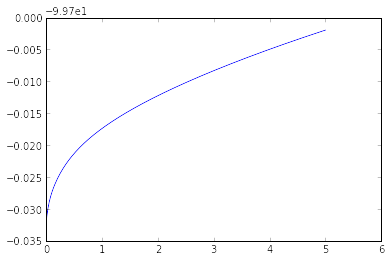

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(vec['t'], vec['v'])
plt.show()
